# 04. Data Processing

### Importando as bibliotecas

In [1]:
import sys
import warnings
sys.path.append('..')
import pandas as pd
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts

### Ignorando os warnings irrelevantes

In [2]:
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning) # Ignorando os warnings do tipo SettingWithCopyWarning

### Armazenando o dataset em uma variável

In [3]:
df = pd.read_csv(consts.DATASET_RAW, low_memory=False) # Armazenando o dataset em uma variável

### Excluindo as colunas que contém valores únicos

In [4]:
df = df.drop([
    'id',
    'listing_url',
    'scrape_id',
    'picture_url',
    'host_id',
    'host_url',
    'host_name',
    'host_thumbnail_url',
    'host_picture_url',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas

### Excluindo as colunas que contém valores constantes

In [5]:
df = df.drop([
    'experiences_offered',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas

### Excluindo as colunas que contém valores vazios

In [6]:
df = df.drop([
    'thumbnail_url',
    'medium_url',
    'xl_picture_url',
    'minimum_minimum_nights',
    'maximum_minimum_nights',
    'minimum_maximum_nights',
    'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'number_of_reviews_ltm',
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas

### Excluindo as colunas que contém muitos valores vazios

In [7]:
df = df.drop([
    'square_feet',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas com valores constantes

### Excluindo as colunas que contém informações redundantes

In [8]:
df = df.drop([
    'last_scraped',
    'host_total_listings_count',
    'street',
    'neighbourhood',
    'neighbourhood_cleansed',
    'neighbourhood_group_cleansed',
    'city',
    'state',
    'zipcode',
    'market',
    'smart_location',
    'country_code',
    'country',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas

### Excluindo as colunas que contém informações irrelevantes

In [9]:
df = df.drop([
    'host_since',
    'host_location',
    'host_acceptance_rate',
    'host_neighbourhood',
    'host_verifications',
    'host_has_profile_pic',
    'host_identity_verified',
    'is_location_exact',
    'weekly_price',
    'monthly_price',
    'calendar_updated',
    'has_availability',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'calendar_last_scraped',
    'first_review',
    'last_review',
    'requires_license',
    'license',
    'jurisdiction_names',
    'require_guest_profile_picture',
    'require_guest_phone_verification',
    'calculated_host_listings_count',
    'reviews_per_month',
    'guests_included',
    'maximum_nights',
    'number_of_reviews',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas

### Excluindo as colunas que contém textos livres

In [10]:
df = df.drop([
    'name',
    'summary',
    'space',
    'description',
    'neighborhood_overview',
    'notes',
    'transit',
    'access',
    'interaction',
    'house_rules',
    'host_about',
    'amenities',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas

### Lendo o dataset tratado e visualizando o overview atual

In [11]:
pd.set_option('display.max_columns', None) # Alterando as configurações do Pandas para exibir mais de 20 colunas

df # Exibindo o dataset

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,NaN,NaN,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,$133.00,"$1,025.00",$102.00,$34.00,60,91.0,9.0,9.0,9.0,9.0,9.0,9.0,f,f,strict_14_with_grace_period,2018,4
1,within an hour,100%,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1.0,2.0,2.0,Real Bed,$270.00,$0.00,$273.00,$51.00,4,93.0,10.0,9.0,10.0,10.0,9.0,9.0,t,f,strict,2018,4
2,within an hour,100%,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,$222.00,$851.00,$211.00,$215.00,3,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
3,within an hour,100%,f,3.0,-22.977117,-43.190454,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,$161.00,"$1,000.00",$220.00,$45.00,4,94.0,9.0,10.0,10.0,10.0,10.0,9.0,f,f,strict,2018,4
4,within an hour,100%,t,1.0,-22.983024,-43.214270,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,$222.00,NaN,$85.00,$68.00,2,96.0,10.0,10.0,10.0,10.0,10.0,9.0,t,f,strict,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902205,within an hour,93%,f,0.0,-23.003180,-43.342840,Apartment,Entire home/apt,4,1.0,0.0,2.0,Real Bed,$121.00,$0.00,$0.00,$50.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
902206,NaN,NaN,f,0.0,-22.966640,-43.393450,Apartment,Entire home/apt,4,2.0,2.0,3.0,Real Bed,$799.00,NaN,NaN,$0.00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,flexible,2019,9
902207,within a few hours,74%,f,32.0,-22.962080,-43.175520,Apartment,Entire home/apt,5,1.0,1.0,2.0,Real Bed,$420.00,NaN,$70.00,$30.00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9
902208,NaN,NaN,f,0.0,-23.003400,-43.341820,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,$250.00,NaN,NaN,$0.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,f,strict_14_with_grace_period,2019,9


In [12]:
df.shape # Visualizando a quantidade de linhas e colunas do dataset

(902210, 30)

In [13]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902210 entries, 0 to 902209
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   host_response_time           500367 non-null  object 
 1   host_response_rate           500364 non-null  object 
 2   host_is_superhost            901750 non-null  object 
 3   host_listings_count          901750 non-null  float64
 4   latitude                     902210 non-null  float64
 5   longitude                    902210 non-null  float64
 6   property_type                902210 non-null  object 
 7   room_type                    902210 non-null  object 
 8   accommodates                 902210 non-null  int64  
 9   bathrooms                    900486 non-null  float64
 10  bedrooms                     901360 non-null  float64
 11  beds                         899708 non-null  float64
 12  bed_type                     902210 non-null  object 
 13 

In [14]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,ano,mes
count,901750.00,902210.00,902210.00,902210.00,900486.00,901360.00,899708.00,902210.00,454194.00,453624.00,453797.00,453560.00,453795.00,453657.00,453659.00,902210.00,902210.00
mean,8.53,-22.97,-43.25,4.21,1.69,1.64,2.60,4.55,94.44,9.62,9.40,9.78,9.75,9.72,9.31,2018.86,6.32
std,46.99,0.03,0.10,2.61,1.20,1.08,2.07,20.84,9.54,0.93,1.12,0.76,0.80,0.77,1.04,0.72,3.40
min,0.00,-23.07,-43.74,1.00,0.00,0.00,0.00,1.00,20.00,2.00,2.00,2.00,2.00,2.00,2.00,2018.00,1.00
25%,1.00,-22.98,-43.32,2.00,1.00,1.00,1.00,1.00,93.00,10.00,9.00,10.00,10.00,10.00,9.00,2018.00,4.00
50%,1.00,-22.97,-43.20,4.00,1.00,1.00,2.00,2.00,98.00,10.00,10.00,10.00,10.00,10.00,10.00,2019.00,6.00
75%,3.00,-22.95,-43.19,6.00,2.00,2.00,3.00,4.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,2019.00,9.00
max,1495.00,-22.75,-43.10,160.00,200.00,45.00,86.00,1224.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,2020.00,12.00


In [15]:
df.describe(exclude='number') # Exibindo as estatísticas das colunas categóricas

,host_response_time,host_response_rate,host_is_superhost,property_type,room_type,bed_type,price,security_deposit,cleaning_fee,extra_people,instant_bookable,is_business_travel_ready,cancellation_policy
count,500367,500364,901750,902210,902210,902210,902210,480930,588704,902210,902210,902210,902210
unique,4,98,2,50,4,5,6453,4126,1519,1015,2,1,6
top,within an hour,100%,f,Apartment,Entire home/apt,Real Bed,$151.00,$0.00,$150.00,$0.00,f,f,flexible
freq,209720,297308,805893,698077,638366,888046,12491,163184,109757,559239,556656,902210,386758


In [16]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_listings_count               460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
price                               0
security_deposit               421280
cleaning_fee                   313506
extra_people                        0
minimum_nights                      0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_scores_communication    448415
review_scores_location         448553
review_scores_value            448551
instant_bookable                    0
is_business_

### Tratando as colunas com valores nulos/vazios

In [17]:
df = df.drop([
    'host_response_time',
    'host_response_rate',
    'security_deposit',
    'cleaning_fee',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    ], 
    axis=1 # Definindo que as colunas serão excluídas
) # Excluindo as colunas com grande parte dos valores vazios, pois não há valores confiáveis para preencher os dados vazios e não são extremamente relevantes para o modelo

In [18]:
df = df.dropna(subset=[
    'bathrooms',
    'bedrooms',
    'beds',
    'host_is_superhost',
    'host_listings_count',
]) # Removendo as linhas com valores nulos da coluna pois são poucos registros em relação à todo o dataset

### Corrigindo os tipos de dados das colunas

In [19]:
df['bathrooms'] = df['bathrooms'].astype('int64') # Convertendo a coluna para o formato inteiro
df['bedrooms'] = df['bedrooms'].astype('int64') # Convertendo a coluna para o formato inteiro
df['beds'] = df['beds'].astype('int64') # Convertendo a coluna para o formato inteiro
df['price'] = df['price'].replace({r'\$': '', ',': ''}, regex=True).astype(float) # Convertendo a coluna para o formato float
df['extra_people'] = df['extra_people'].replace({r'\$': '', ',': ''}, regex=True).astype(float) # Convertendo a coluna para o formato float

### Criando colunas de tempo/idade

- N/A

### Mesclando colunas com muitas categorias

In [20]:
colunas_agrupar = df['property_type'].value_counts()[lambda x: x < 2000].index # Contando as ocorrências e definindo as regras

df.loc[df['property_type'].isin(colunas_agrupar), 'property_type'] = 'Others' # Atualizando os valores

In [21]:
colunas_agrupar = df['bed_type'].value_counts()[lambda x: x < 10000].index # Contando as ocorrências e definindo as regras

df.loc[df['bed_type'].isin(colunas_agrupar), 'bed_type'] = 'Others' # Atualizando os valores

In [22]:
colunas_agrupar = df['cancellation_policy'].value_counts()[lambda x: x < 10000].index # Contando as ocorrências e definindo as regras

df.loc[df['cancellation_policy'].isin(colunas_agrupar), 'cancellation_policy'] = 'strict' # Atualizando os valores

### Unificando colunas semelhantes

- N/A

### Criando colunas derivadas de outras

- N/A

### Visualizando o dataset antes de tratar outliers e excluir colunas

In [23]:
df.head(3) # Exibindo as 3 primeiras linhas do dataset

,host_is_superhost,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,extra_people,minimum_nights,instant_bookable,is_business_travel_ready,cancellation_policy,ano,mes
0,f,1.0,-22.946854,-43.182737,Apartment,Entire home/apt,4,1,0,2,Real Bed,133.0,34.0,60,f,f,strict_14_with_grace_period,2018,4
1,t,2.0,-22.965919,-43.178962,Condominium,Entire home/apt,5,1,2,2,Real Bed,270.0,51.0,4,t,f,strict,2018,4
2,f,1.0,-22.985698,-43.201935,Apartment,Entire home/apt,2,1,1,1,Real Bed,222.0,215.0,3,f,f,strict,2018,4


In [24]:
df.shape

(897709, 19)

### Tratando as colunas com valores outliers

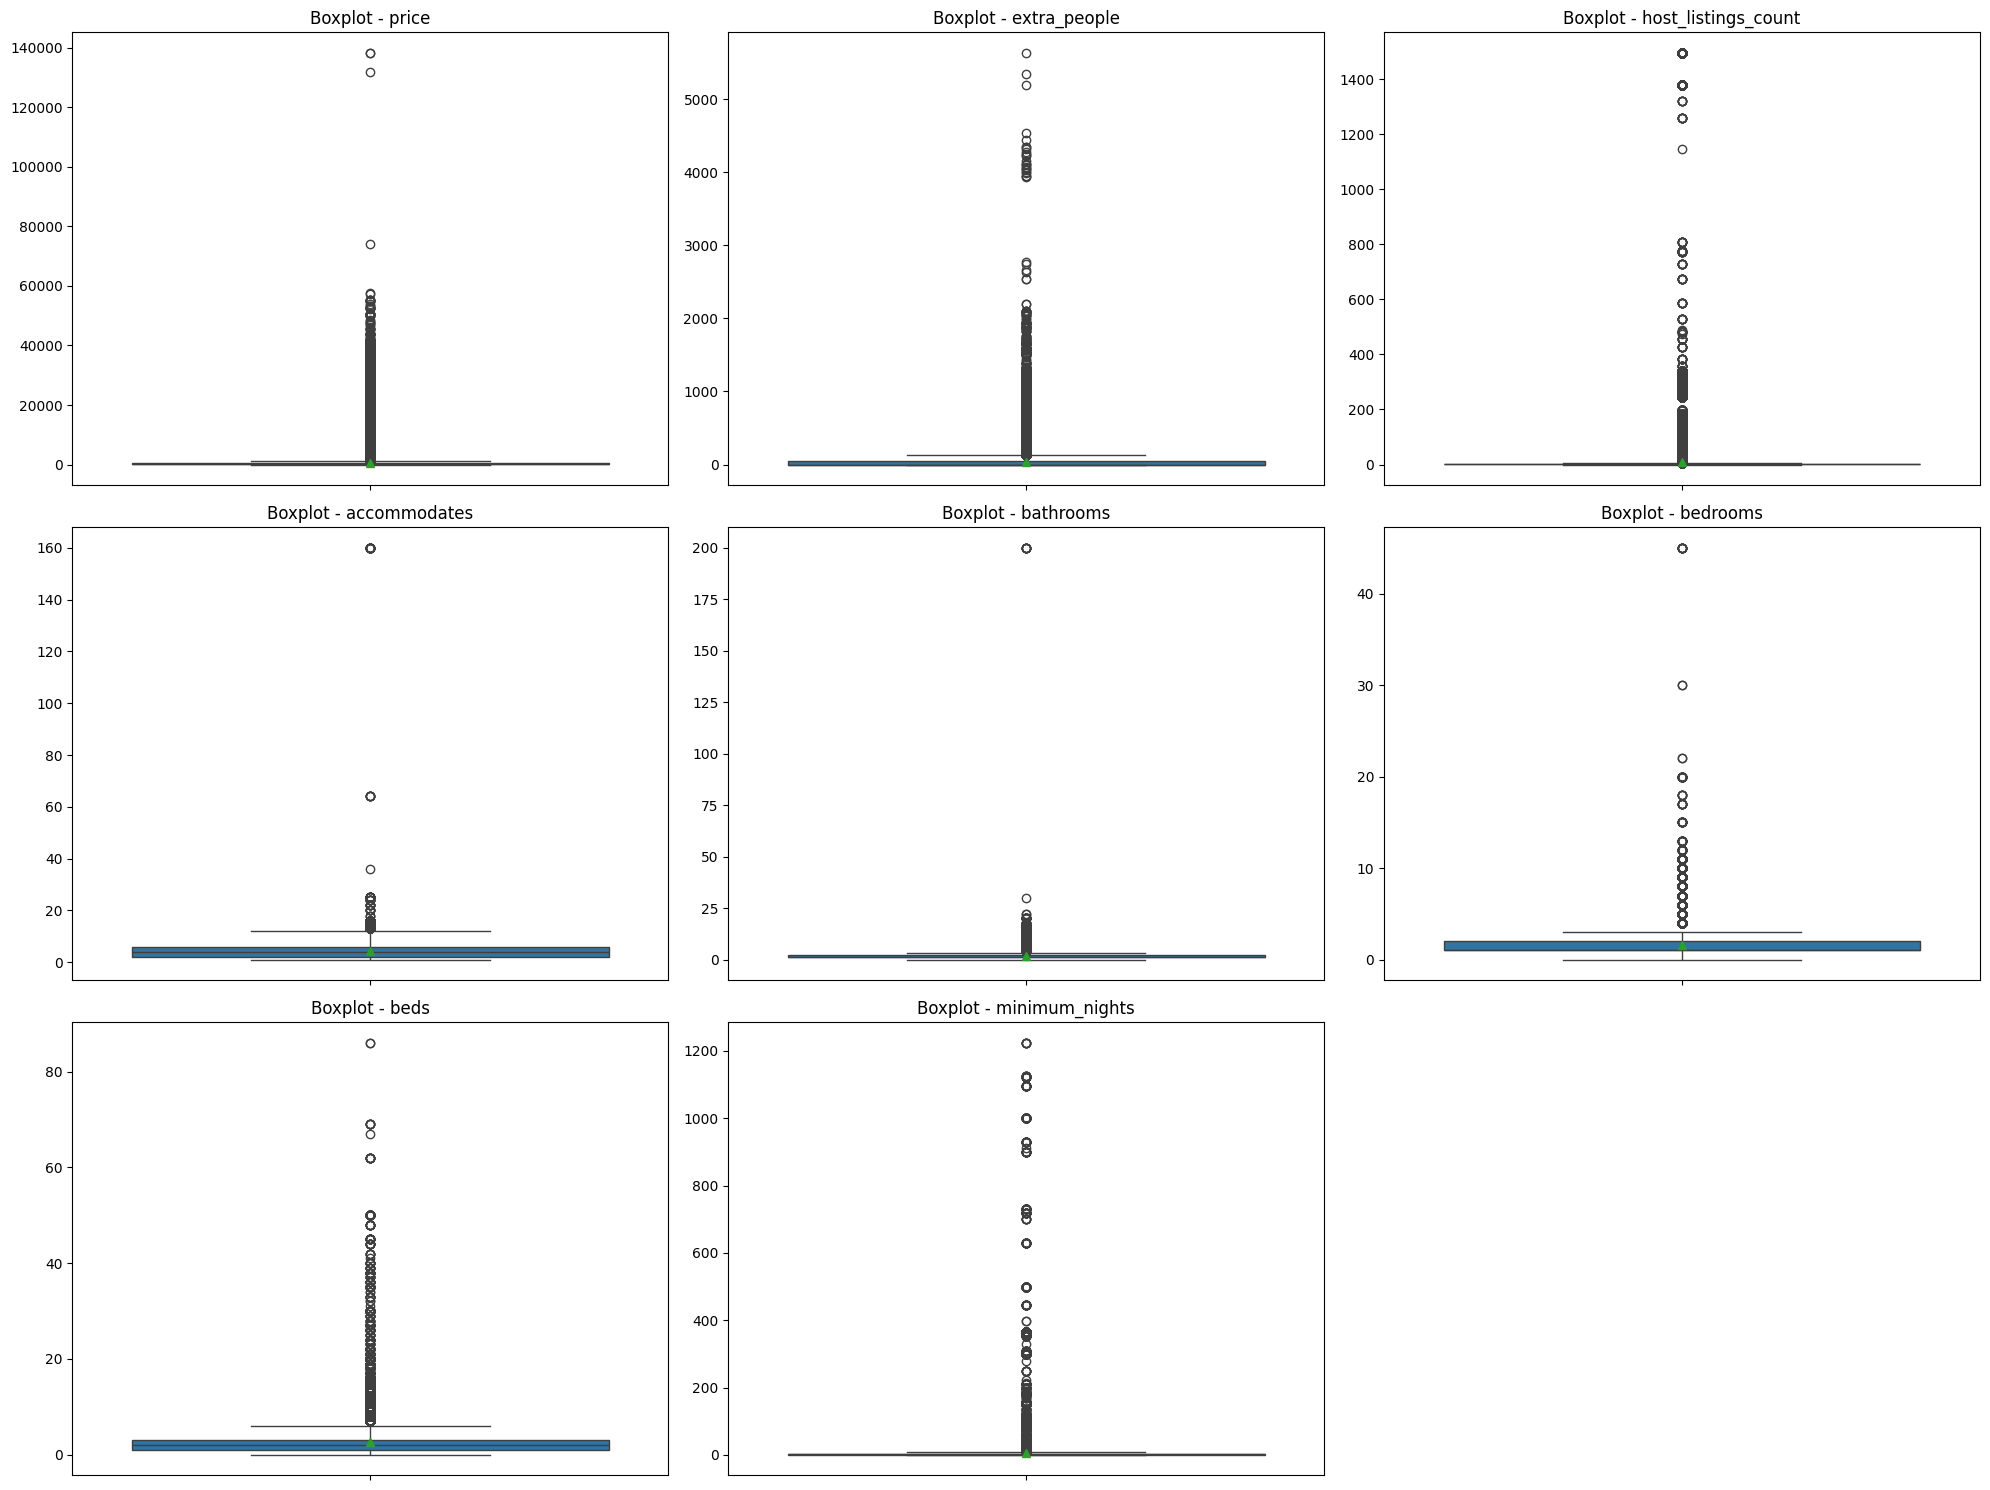

In [25]:
fn_charts.boxplots(df, [
    'price',
    'extra_people',
    'host_listings_count',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'minimum_nights',
]) # Exibindo os gráficos de boxplots antes do tratamento

In [26]:
df = df.drop(fn_stats.inspect_outliers(df,'price').index) # Removendo os outliers 
df = df.drop(fn_stats.inspect_outliers(df,'extra_people').index) # Removendo os outliers 
df = df.drop(fn_stats.inspect_outliers(df,'host_listings_count').index) # Removendo os outliers 
df = df.drop(fn_stats.inspect_outliers(df,'accommodates').index) # Removendo os outliers 
df = df.drop(fn_stats.inspect_outliers(df,'bathrooms').index) # Removendo os outliers 
df = df.drop(fn_stats.inspect_outliers(df,'bedrooms').index) # Removendo os outliers 
df = df.drop(fn_stats.inspect_outliers(df,'beds').index) # Removendo os outliers 
df = df.drop(fn_stats.inspect_outliers(df,'minimum_nights').index) # Removendo os outliers 

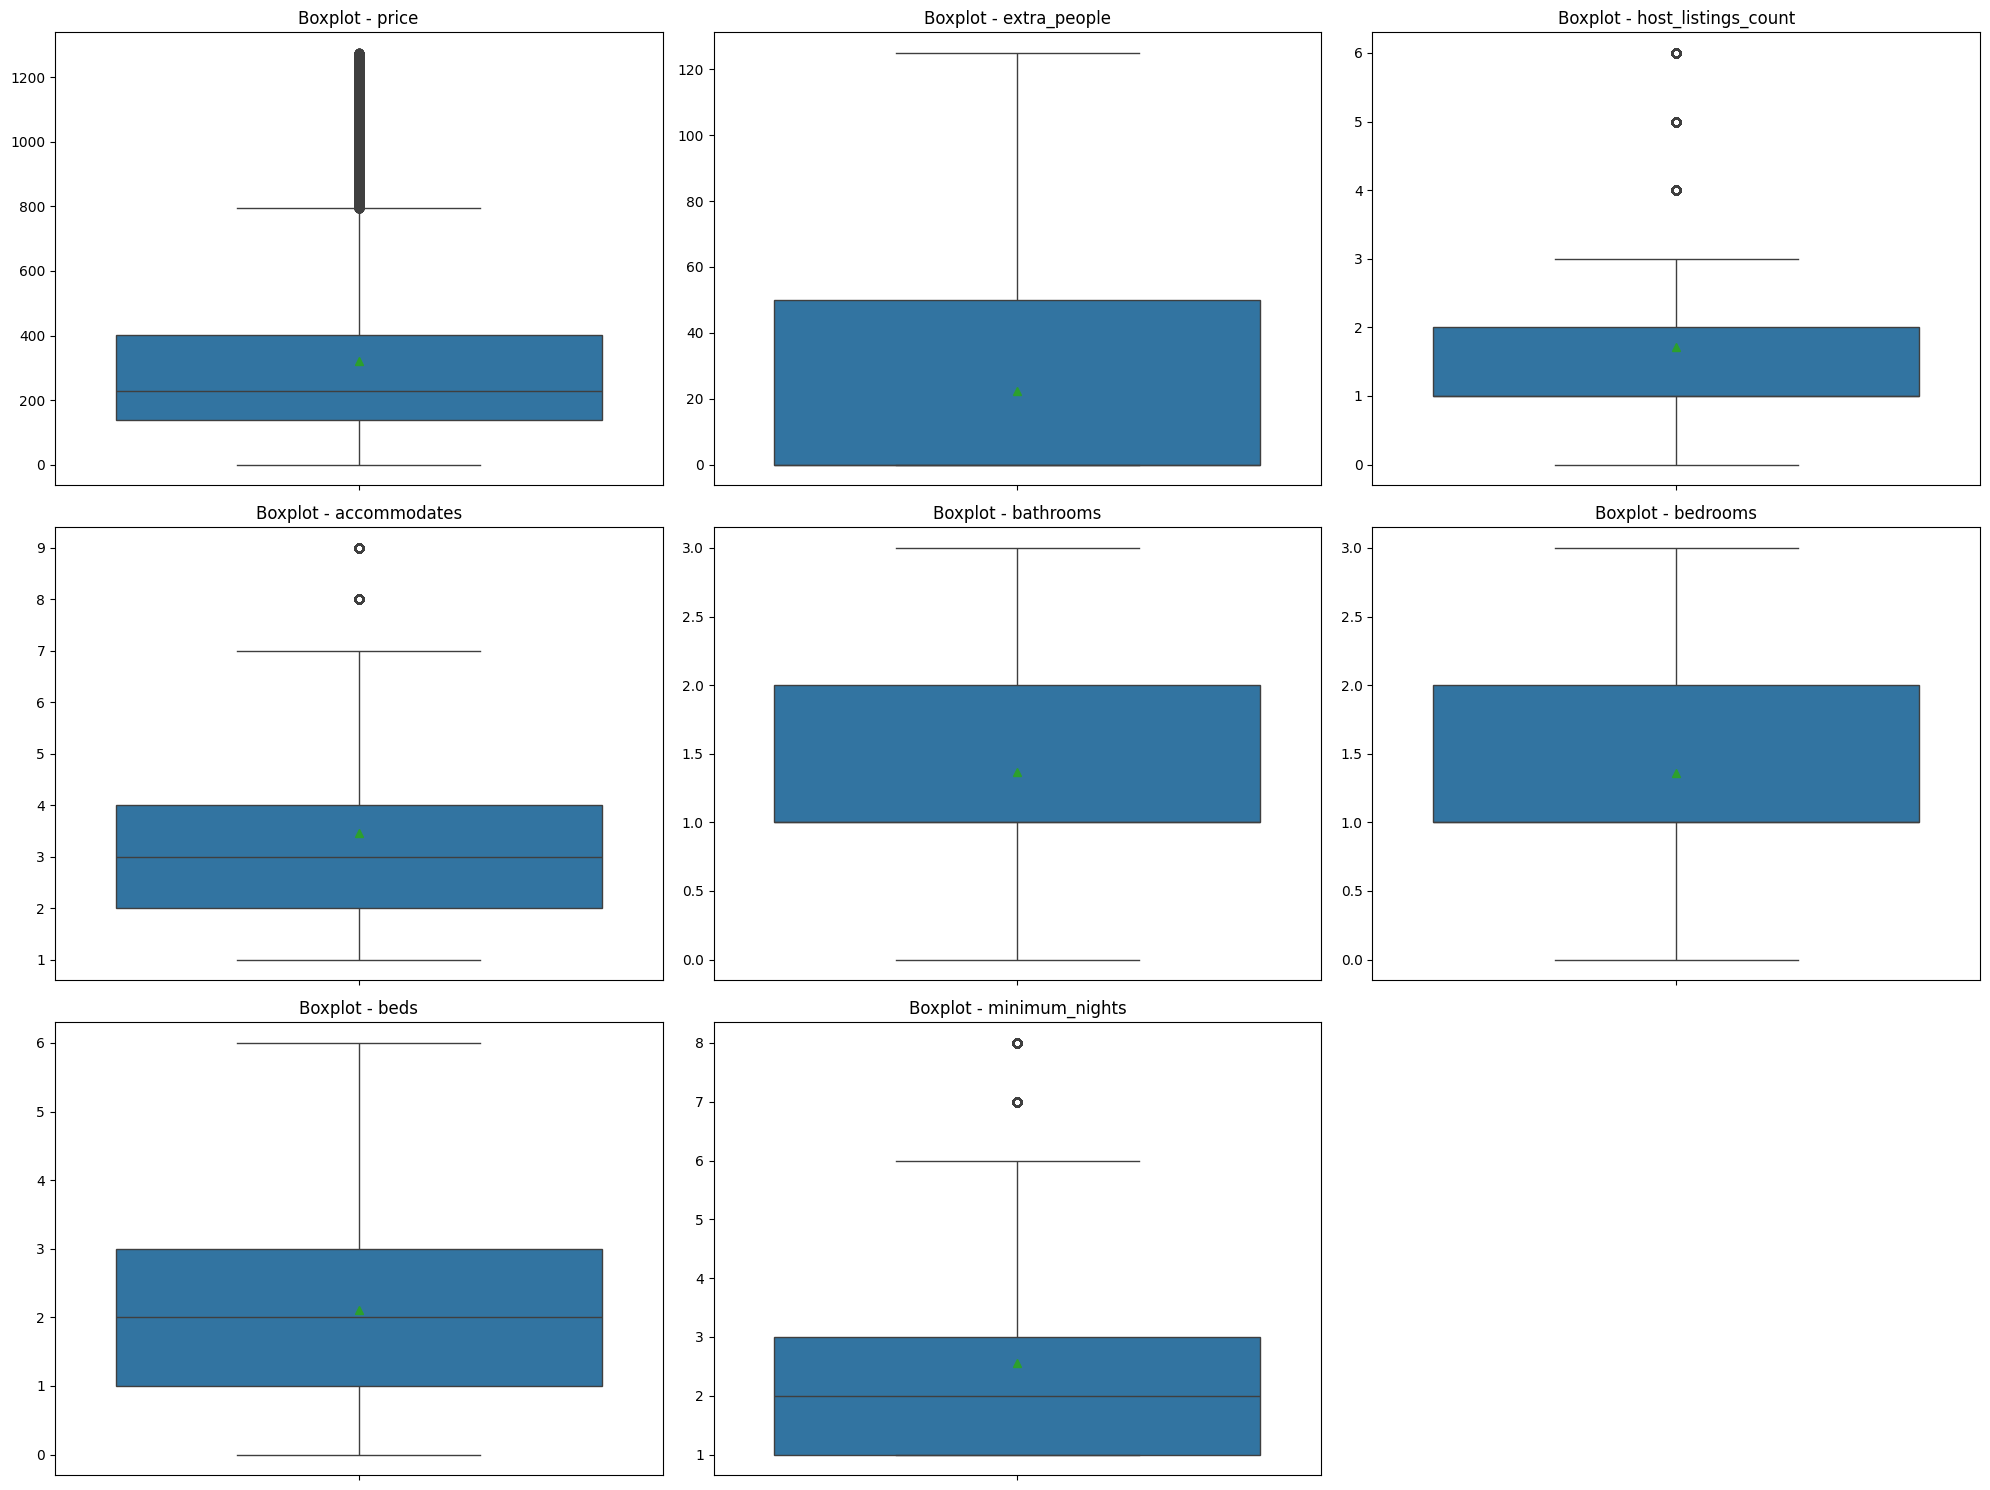

In [27]:
fn_charts.boxplots(df, [
    'price',
    'extra_people',
    'host_listings_count',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'minimum_nights',
]) # Exibindo os gráficos de boxplots antes do tratamento

### Excluindo as colunas auxiliares

- N/A

### Salvando o dataset lean

In [29]:
df.to_csv(consts.DATASET_LEAN, index=False) # Salvando o dataset lean